In [1]:
import warnings                                    # 경고 메시지를 출력하지 않게 하기 위해 import한다.
warnings.filterwarnings(action='ignore')           # 경고 메시지를 출력하지 않게 한다.(default는 출력!)
%config Completer.use_jedi = False                  # 자동 완성 기능이 실행되지 않을 시 가능하게 한다.
import numpy as np                                 # 수치 계산, 배열 처리를 하기 위해 import한다.
import pandas as pd                                # 데이터 분석을 위한 전처리를 위해 import한다.
import matplotlib.pyplot as plt                    # 시각화를 하기 위해 import한다.
import matplotlib as mpl                           # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 현상을 방지하기 위해 import한다.
mpl.rcParams['axes.unicode_minus'] = False         # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 현상을 방지한다.
plt.rcParams['font.family'] = 'NanumGothicCoding'  # matplotlib에서 사용할 한글 글꼴을 지정한다.
plt.rcParams['font.size'] = 15                     # matplotlib에서 사용할 글꼴의 크기를 지정한다.
import seaborn as sns                              # matplotlib을 기반으로 만든 시각화 도구를 import한다.
from plotnine import *                             # R의 ggplot2 패키지를 사용하는 것처럼 사용하는 시각화 도구를 import한다.
import missingno as msno                           # 누락값의 분포를 그래프 형태로 보기 위해 import한다.
import folium        

In [2]:
df = pd.read_csv('./data/covid.csv', encoding='cp949')
df

,자치구기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서초구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2023.05.31.00,83071,86,74856,79,127651,119,176336,170,213585,...,243336,202,315903,264,405933,412,283400,264,406767,465
1,2023.05.30.00,82985,53,74777,39,127532,53,176166,96,213395,...,243134,114,315639,172,405521,251,283136,155,406302,150
2,2023.05.29.00,82932,10,74738,11,127479,20,176070,32,213299,...,243020,83,315467,86,405270,71,282981,61,406152,93
3,2023.05.28.00,82922,29,74727,42,127459,47,176038,74,213269,...,242937,76,315381,155,405199,146,282920,99,406059,186
4,2023.05.27.00,82893,54,74685,59,127412,83,175964,127,213212,...,242861,146,315226,199,405053,316,282821,194,405873,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,20.02.09.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1207,20.02.08.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1208,20.02.07.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1209,20.02.06.10,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [3]:
df.columns.name = '연번'
df

연번,자치구기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서초구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2023.05.31.00,83071,86,74856,79,127651,119,176336,170,213585,...,243336,202,315903,264,405933,412,283400,264,406767,465
1,2023.05.30.00,82985,53,74777,39,127532,53,176166,96,213395,...,243134,114,315639,172,405521,251,283136,155,406302,150
2,2023.05.29.00,82932,10,74738,11,127479,20,176070,32,213299,...,243020,83,315467,86,405270,71,282981,61,406152,93
3,2023.05.28.00,82922,29,74727,42,127459,47,176038,74,213269,...,242937,76,315381,155,405199,146,282920,99,406059,186
4,2023.05.27.00,82893,54,74685,59,127412,83,175964,127,213212,...,242861,146,315226,199,405053,316,282821,194,405873,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,20.02.09.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1207,20.02.08.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1208,20.02.07.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1209,20.02.06.10,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [4]:
df.columns

Index(['자치구기준일', '종로구 전체', '종로구 추가', '중구 전체', '중구 추가', '용산구 전체', '용산구 추가',
       '성동구 전체', '성동구 추가', '광진구 전체', '광진구 추가', '동대문구 전체', '동대문구 추가', '중랑구 전체',
       '중랑구 추가', '성북구 전체', '성북구 추가', '강북구 전체', '강북구 추가', '도봉구 전체', '도봉구 추가',
       '노원구 전체', '노원구 추가', '은평구 전체', '은평구 추가', '서대문구 전체', '서대문구 추가', '마포구 전체',
       '마포구 추가', '양천구 전체', '양천구 추가', '강서구 전체', '강서구 추가', '구로구 전체', '구로구 추가',
       '금천구 전체', '금천구 추가', '영등포구 전체', '영등포구 추가', '동작구 전체', '동작구 추가', '관악구 전체',
       '관악구 추가', '서초구 전체', '서초구 추가', '강남구 전체', '강남구 추가', '송파구 전체', '송파구 추가',
       '강동구 전체', '강동구 추가', '기타 전체', '기타 추가'],
      dtype='object', name='연번')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구기준일   1211 non-null   object
 1   종로구 전체   1211 non-null   int64 
 2   종로구 추가   1211 non-null   int64 
 3   중구 전체    1211 non-null   int64 
 4   중구 추가    1211 non-null   int64 
 5   용산구 전체   1211 non-null   int64 
 6   용산구 추가   1211 non-null   int64 
 7   성동구 전체   1211 non-null   int64 
 8   성동구 추가   1211 non-null   int64 
 9   광진구 전체   1211 non-null   int64 
 10  광진구 추가   1211 non-null   int64 
 11  동대문구 전체  1211 non-null   int64 
 12  동대문구 추가  1211 non-null   int64 
 13  중랑구 전체   1211 non-null   int64 
 14  중랑구 추가   1211 non-null   int64 
 15  성북구 전체   1211 non-null   int64 
 16  성북구 추가   1211 non-null   int64 
 17  강북구 전체   1211 non-null   int64 
 18  강북구 추가   1211 non-null   int64 
 19  도봉구 전체   1211 non-null   int64 
 20  도봉구 추가   1211 non-null   int64 
 21  노원구 전체   1211 non-null   int64 
 22  

In [6]:
df.isnull().sum()

연번
자치구기준일     0
종로구 전체     0
종로구 추가     0
중구 전체      0
중구 추가      0
용산구 전체     0
용산구 추가     0
성동구 전체     0
성동구 추가     0
광진구 전체     0
광진구 추가     0
동대문구 전체    0
동대문구 추가    0
중랑구 전체     0
중랑구 추가     0
성북구 전체     0
성북구 추가     0
강북구 전체     0
강북구 추가     0
도봉구 전체     0
도봉구 추가     0
노원구 전체     0
노원구 추가     0
은평구 전체     0
은평구 추가     0
서대문구 전체    0
서대문구 추가    0
마포구 전체     0
마포구 추가     0
양천구 전체     0
양천구 추가     0
강서구 전체     0
강서구 추가     0
구로구 전체     0
구로구 추가     0
금천구 전체     0
금천구 추가     0
영등포구 전체    0
영등포구 추가    0
동작구 전체     0
동작구 추가     0
관악구 전체     0
관악구 추가     0
서초구 전체     0
서초구 추가     0
강남구 전체     0
강남구 추가     0
송파구 전체     0
송파구 추가     0
강동구 전체     0
강동구 추가     0
기타 전체      0
기타 추가      0
dtype: int64

<AxesSubplot:>

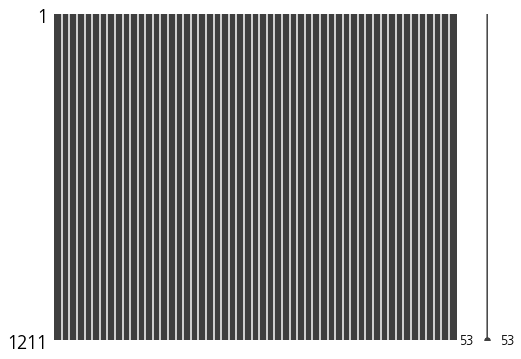

In [7]:
msno.matrix(df, figsize=(8, 6))

In [8]:
print(df.shape)

(1211, 53)


In [9]:
df['자치구기준일'] = pd.to_datetime(df.자치구기준일)
df.dtypes

연번
자치구기준일     datetime64[ns]
종로구 전체              int64
종로구 추가              int64
중구 전체               int64
중구 추가               int64
용산구 전체              int64
용산구 추가              int64
성동구 전체              int64
성동구 추가              int64
광진구 전체              int64
광진구 추가              int64
동대문구 전체             int64
동대문구 추가             int64
중랑구 전체              int64
중랑구 추가              int64
성북구 전체              int64
성북구 추가              int64
강북구 전체              int64
강북구 추가              int64
도봉구 전체              int64
도봉구 추가              int64
노원구 전체              int64
노원구 추가              int64
은평구 전체              int64
은평구 추가              int64
서대문구 전체             int64
서대문구 추가             int64
마포구 전체              int64
마포구 추가              int64
양천구 전체              int64
양천구 추가              int64
강서구 전체              int64
강서구 추가              int64
구로구 전체              int64
구로구 추가              int64
금천구 전체              int64
금천구 추가              int64
영등포구 전체             int64
영등포구 추가  

In [11]:
print(type(df.자치구기준일))

<class 'pandas.core.series.Series'>
